In [ ]:
import numpy as np
# NEXT LINE ONLY FOR COLAB!
# %tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
# COMMENT OUT THIS LINE FOR COLAB!
#%matplotlib notebook

In [ ]:
print(tf.__version__)

2.3.1


# Matrix Math Functions

Remember the statement that tensorflow is an awful lot like NumPy? This means you can also do an awful lot of math in it.
If you remember from last week, we discussed that in the end to calculate what our network does and to do backpropagation, all we need is Linear Algebra and a way to efficiently do matrix calculation. Luckily, tensorflow has those already implemented: https://www.tensorflow.org/api_docs/python/tf/linalg

In [ ]:
M = tf.ones((3,3)) # 3x3 matrix filled with 1
print(M)

# norms
e = tf.linalg.norm(M)
print(e)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)


In [ ]:
# matrix transpose
A = tf.constant([1, 2, 3, 4, 5, 6], shape=[2, 3])
print("A: ", A)
print("A': ", tf.linalg.matrix_transpose(A))


A:  tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
A':  tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int32)


In [ ]:
# matrix multiplication
A = tf.constant([1, 2, 3, 4, 5, 6], shape=[2, 3])
print("A: ", A) # 2-D tensor

B = tf.constant([7, 8, 9, 10, 11, 12], shape=[3, 2])
print("B: ", B)  # 2-D tensor

C = tf.linalg.matmul(a, b)
print("C: ", C)  # `a` * `b`

A:  tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
B:  tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32)
C:  tf.Tensor(
[[ 58  64]
 [139 154]], shape=(2, 2), dtype=int32)


# Activation Functions

Tensorflow offers a lot of Neural Network (NN) Operations which can be found under tf.nn. Most importantly, all the relevant activation functions are already implemented in tensorflow.

### Sigmoid

You should already be familiar with the sigmoid activation function. It is useful for binary classification problems as it maps values onto a number between 0 and 1, hence it is able to introduce a sense of uncertainty between two classes.

<IPython.core.display.Javascript object>


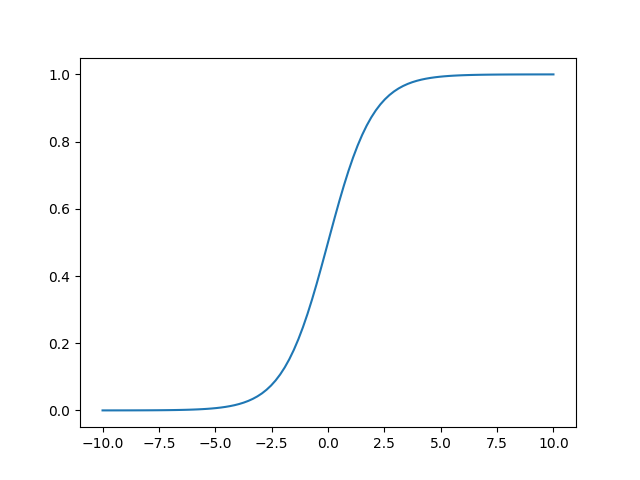

In [ ]:
xs = np.linspace(-10,10,100)
fig, ax = plt.subplots()
ax.plot(xs, tf.nn.sigmoid(xs))
plt.show()

### TanH

TanH is another double-saturatin functions which is however centered around 0. Let's have a look at it and it's derivative.

<IPython.core.display.Javascript object>


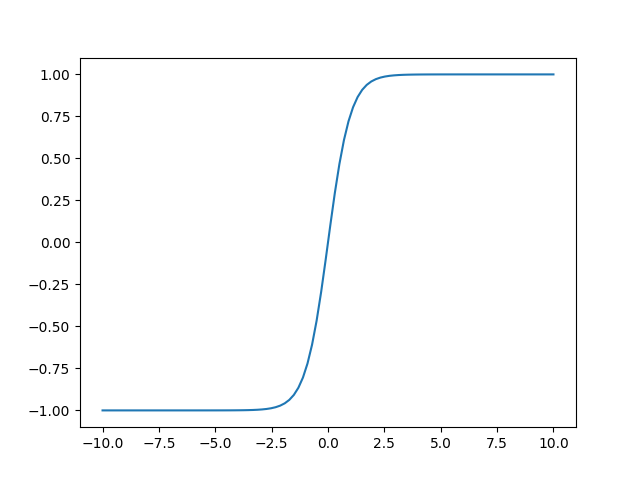

In [ ]:
# TanH
xs = np.linspace(-10,10,100)
fig, ax = plt.subplots()
ax.plot(xs, tf.nn.tanh(xs))
plt.show()

<IPython.core.display.Javascript object>


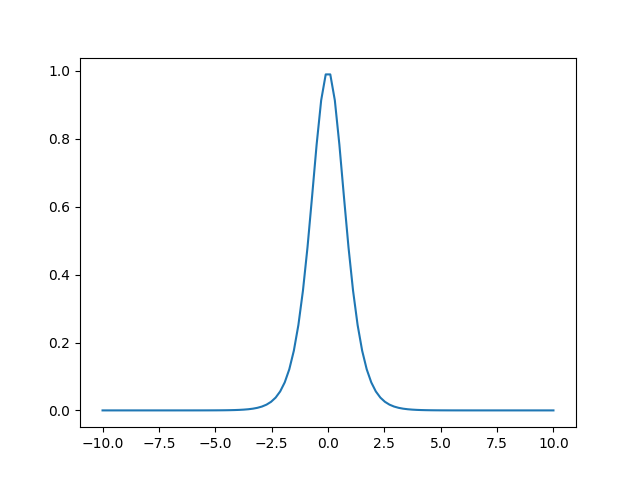

In [ ]:
# Derivative of TanH
x = tf.Variable(xs)

# do not worry about this line, we will explain this in the next chapters
with tf.GradientTape() as tape:
  y = tf.nn.tanh(x)
dy_dx = tape.gradient(y, x).numpy()

fig, ax = plt.subplots()
ax.plot(xs, dy_dx)
plt.show()

If you remember what we discussed last week, you will realize that in each each backprop step (for each delta) we multiply with the derivative of the activation function applied to the drive.

$$ \delta_i^{(l)}= \begin{cases} \frac{1}{m} (-t_j + \hat y_j)\sigma'(d_i^{(N)}) \text{ if l = N (this is dependent on the specific loss function, replace if necessary)}\\ (\sum_k^{m}\delta_k^{l+1} w_{ki}^{l+1}) \sigma'(d_i^{(l)})   \text{ else} \end{cases}$$

In each backprop step (for each delta) we multiply with the derivative. If a lot of drives are either very positive or negative we often multiply with a value near 0. The delta values for the first layers (and with them the gradients) might get 0 for early layers. Thus the weights in early layers might not get any updates and thus do not learn.

This problem is often referred to as **Vanishing Gradients**.

You will learn about ways to tackle this problem later during this course, so stay tuned!

### Softmax

Softmax is meant for classification task with multiple categories.
Imagine such categories being encoded as one-hot vetors. In the end, we again want to end up with a vector of the same size encoding a probability distribution to express the certainty of our classification. The softmax does exactly that, mapping our drive to such a distribution. Hence, each value of our output refers to the predicted probability of the input belonging to the respective class.



In [ ]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

x = [1.2, 2.5, 3.1, 4.4]
print("numpy:", softmax(x))

# using tensorflow
print("tensorflow: ",tf.nn.softmax(x))

numpy: [0.02786468 0.10224379 0.18630033 0.68359119]
tensorflow:  tf.Tensor([0.02786468 0.10224379 0.1863003  0.68359125], shape=(4,), dtype=float32)


### ReLU

ReLu stands for Rectified Linear Unit and is a single-saturating function. It is one of the most common activation functions out there. 

<IPython.core.display.Javascript object>


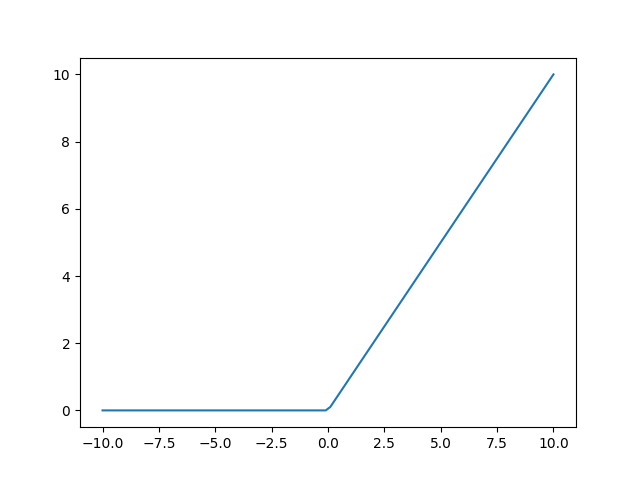

In [ ]:
xs = np.linspace(-10,10,100)
fig, ax = plt.subplots()
ax.plot(xs, tf.nn.relu(xs))
plt.show()

Looks pretty. But now let's have a look at it's derivative. Can you spot a problem there?

<IPython.core.display.Javascript object>


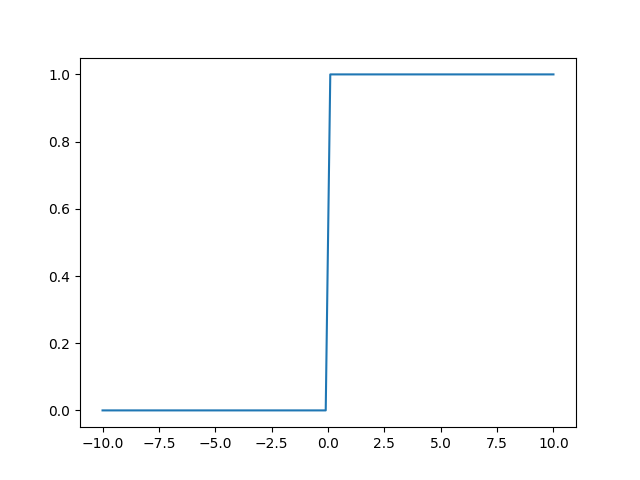

In [ ]:
x = tf.Variable(xs)

# do not worry about this line, we will explain this in the next chapters
with tf.GradientTape() as tape:
  y = tf.nn.relu(x)
dy_dx = tape.gradient(y, x).numpy()

fig, ax = plt.subplots()
ax.plot(xs, dy_dx)
plt.show()

If you again remember what we discussed last week, you will realize that in each each backprop step (for each delta) we multiply with the derivative of the activation function applied to the drive.

$$ \delta_i^{(l)}= \begin{cases} \frac{1}{m} (-t_j + \hat y_j)\sigma'(d_i^{(N)}) \text{ if l = N (this is dependent on the specific loss function, replace if necessary)}\\ (\sum_k^{m}\delta_k^{l+1} w_{ki}^{l+1}) \sigma'(d_i^{(l)})   \text{ else} \end{cases}$$

If a lot of drives are positive we often multiply by 1. Thus the deltas are never scaled. The delta values for the first layers (and with them the gradients) might get very large for early layers. Thus the weights in early layers might get too large updates and not learn anything useful.

This problem is known as **Exploding Gradients**.


Now imagine a neuron is not activated by any of the inputs, which means the drive of the neuron is always negative.The delta value is always 0, as we multiply with the derivative of the drive.Thus the weights never receive updates. The neuron will never be updated.

This problem is known as **Dying ReLUs**.

Some improvements has been made to the ReLU to tackle these problems.

<IPython.core.display.Javascript object>


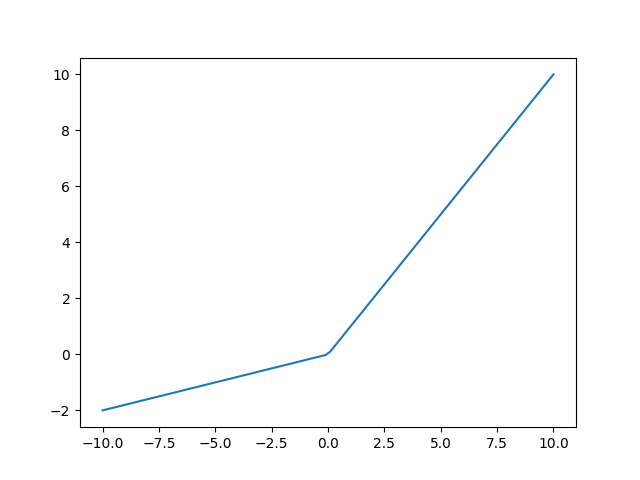

In [ ]:
# Leaky ReLu
xs = np.linspace(-10,10,100)
fig, ax = plt.subplots()
ax.plot(xs, tf.nn.leaky_relu(xs))
plt.show()

<IPython.core.display.Javascript object>


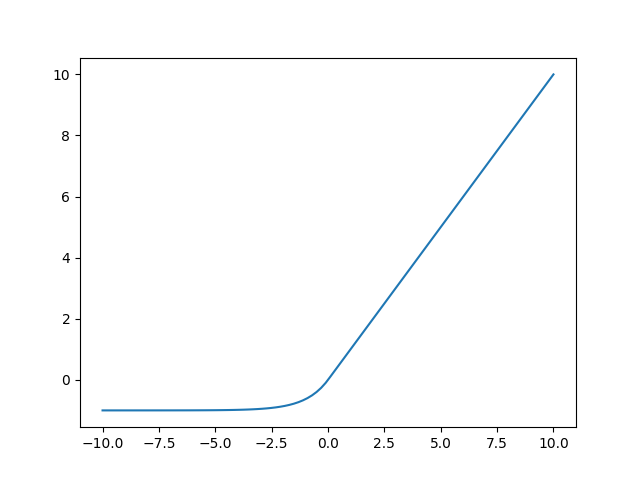

In [ ]:
# ELU
xs = np.linspace(-10,10,100)
fig, ax = plt.subplots()
ax.plot(xs, tf.nn.elu(xs))
plt.show()

There are more ways to solve these problems and we will make sure to introduce them throughout this course. 
But for now, let's continue to get familiar with tensorflow.